In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [8]:
tata_motors=pd.read_csv("/Users/pulin05/Downloads/Kaggle/NIFTY-50 Stock Market Data (2000 - 2021)/TATAMOTORS.csv")
tata_steel=pd.read_csv("/Users/pulin05/Downloads/Kaggle/NIFTY-50 Stock Market Data (2000 - 2021)/TATASTEEL.csv")
tcs=pd.read_csv("/Users/pulin05/Downloads/Kaggle/NIFTY-50 Stock Market Data (2000 - 2021)/TCS.csv")

In [17]:
tata_motors.head()
tata_motors.shape
tata_motors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [16]:
tata_motors.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [18]:
tata_motors.duplicated().sum()

tata_steel.duplicated().sum()

tcs.duplicated().sum()

0

In [19]:
tata_motors.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5.306000e+03,5.306000e+03,2456.00,4792.00,4792.00
mean,409.43,410.15,417.12,402.18,409.45,409.45,409.76,1.046560e+07,2.790772e+14,128439.98,2805962.22,0.36
std,272.48,272.97,277.02,268.03,272.52,272.47,272.49,2.185034e+07,4.674351e+14,104954.58,3579713.03,0.16
min,58.80,58.00,60.70,57.55,58.75,58.80,59.24,1.235100e+04,1.069384e+11,3434.00,12351.00,0.04
25%,174.60,174.76,178.82,171.01,174.72,174.60,175.18,1.668994e+06,7.049025e+13,75478.25,646920.00,0.23
50%,377.25,378.90,384.75,372.60,377.52,377.25,378.46,4.141648e+06,1.967418e+14,100034.00,1636751.50,0.36
75%,523.15,523.48,530.80,515.91,523.49,523.15,523.72,8.706037e+06,3.175959e+14,142064.75,3761212.25,0.48
max,1365.15,1361.00,1382.00,1347.00,1362.00,1365.15,1362.15,3.905778e+08,9.365671e+15,1318669.00,73338482.00,1.00


In [22]:
tata_motors["Date"]=pd.to_datetime(tata_motors["Date"])
tata_steel["Date"]=pd.to_datetime(tata_steel["Date"])
tcs["Date"]=pd.to_datetime(tcs["Date"])
tata_motors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series              5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   Close               5306 non-null   float64       
 9   VWAP                5306 non-null   float64       
 10  Volume              5306 non-null   int64         
 11  Turnover            5306 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4792 non-null   float64     

In [23]:
tata_motors=tata_motors.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
tata_steel=tata_steel.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
tcs=tcs.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)

In [24]:
tata_motors['Month']=tata_motors["Date"].dt.month

tata_motors['Year']=tata_motors["Date"].dt.year

tata_motors['Day']=tata_motors["Date"].dt.day


tata_steel['Month']=tata_steel["Date"].dt.month

tata_steel['Year']=tata_steel["Date"].dt.year

tata_steel['Day']=tata_steel["Date"].dt.day


tcs['Day']=tcs['Date'].dt.day

tcs['Year']=tcs['Date'].dt.year

tcs['Month']=tcs['Date'].dt.month

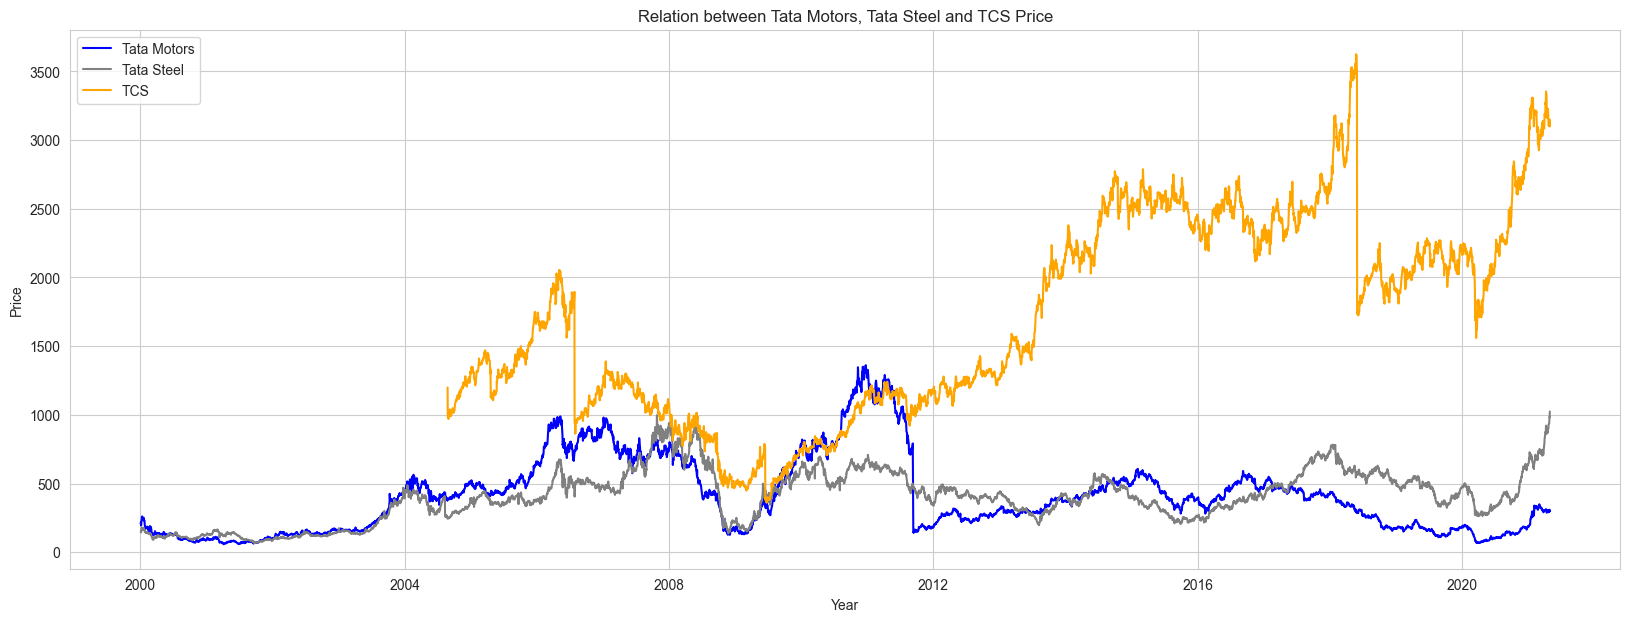

In [33]:
plt.figure(figsize=(20,7))

plt.plot(tata_motors['Date'],tata_motors['Open'],color='blue',label='Tata Motors')
plt.plot(tata_steel['Date'],tata_steel['Open'],color='grey',label='Tata Steel')

plt.plot(tcs['Date'],tcs['Open'],color='orange',label='TCS')

plt.title("Relation between Tata Motors, Tata Steel and TCS Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="")
plt.show()


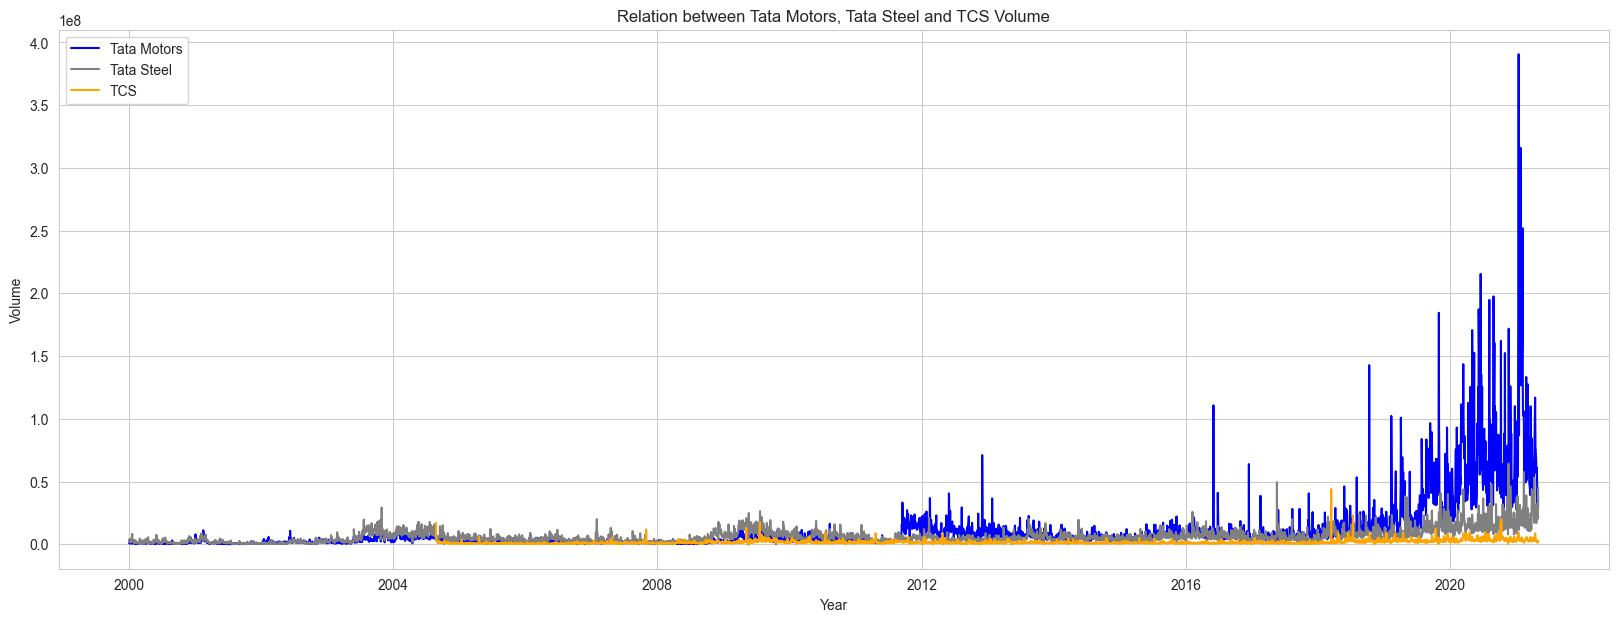

In [35]:
plt.figure(figsize=(20,7))

plt.plot(tata_motors['Date'],tata_motors['Volume'],color='blue',label='Tata Motors')

plt.plot(tata_steel['Date'],tata_steel['Volume'],color='grey',label='Tata Steel')

plt.plot(tcs['Date'],tcs['Volume'],color='orange',label='TCS')



plt.title("Relation between Tata Motors, Tata Steel and TCS Volume")

plt.xlabel("Year")

plt.ylabel("Volume")

plt.legend(title="")

plt.show()